# <center>Lead Scoring Case Study</center>

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 ## Importing Libraries and Data

In [1]:
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
#importing dataset to csv

leads_df=pd.read_csv("Leads.csv")

In [4]:
#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Let's check the dimesions of the dataframe
leads_df.shape

(9240, 37)

In [6]:
#Statistical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

## Data cleaning

In [10]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [12]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
#Drop all the columns with more than 40% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, 1, inplace = True)

In [15]:
#checking percentage of null values in each column after dropping columns with more than 40% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Dealing with missing values

In [16]:
def countplot(col):
    plt.figure(figsize=(15,5))
    sns.countplot(x = leads_df[col], data = leads_df)
    plt.title(col, size=15)
    plt.xticks(rotation=90)
    plt.show()

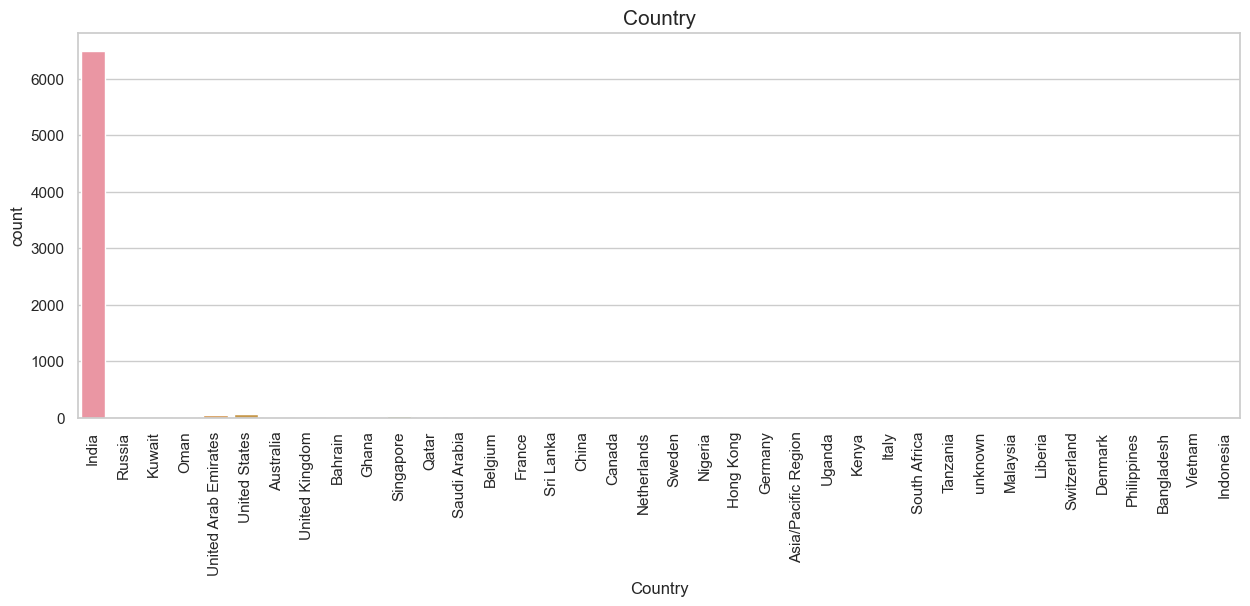

In [17]:
# Column 'country' with 26.63% missing values
countplot('Country')

Since the column is skewed towards 'India', we can impute the missing values with India.

In [18]:
leads_df['Country']=leads_df['Country'].replace(np.nan,'India')

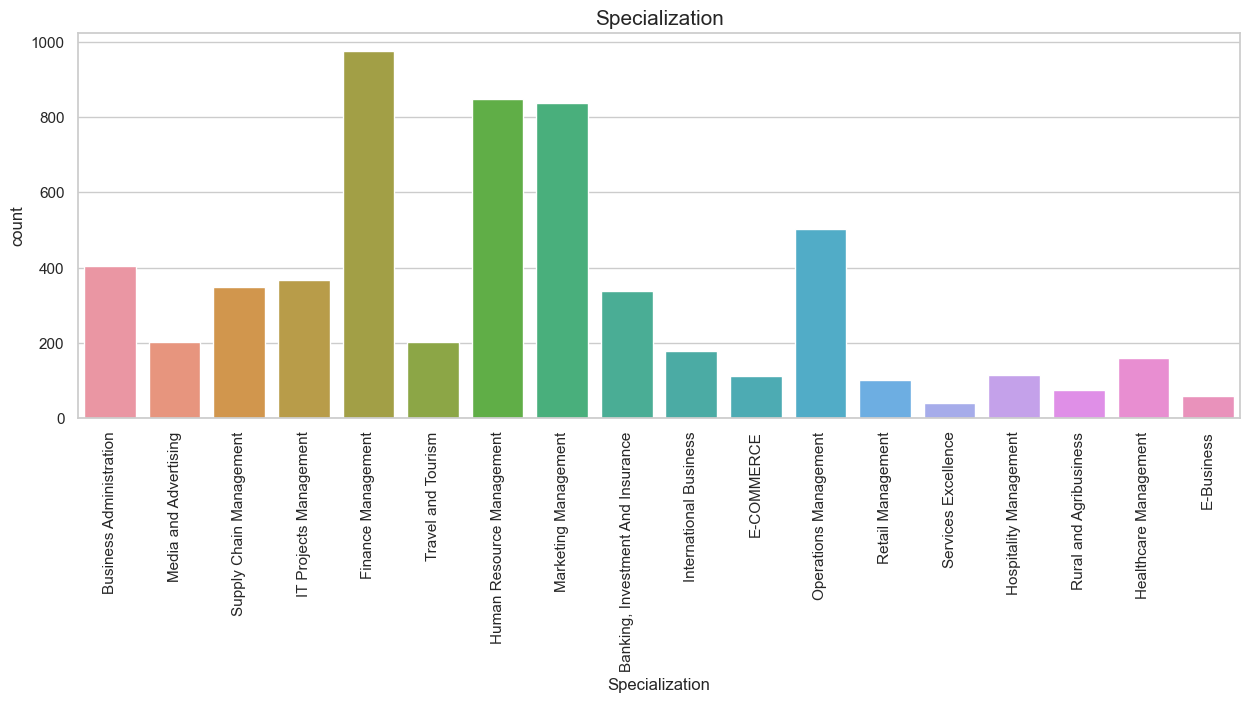

In [19]:
# Column 'Specialization' with 36.58% missing values
countplot('Specialization')

The data is not highy skewed towards any particular specialization. Hence we can create a new category called 'Others' for the  missing values.

In [20]:
leads_df['Specialization']=leads_df['Specialization'].replace(np.nan,'Others')

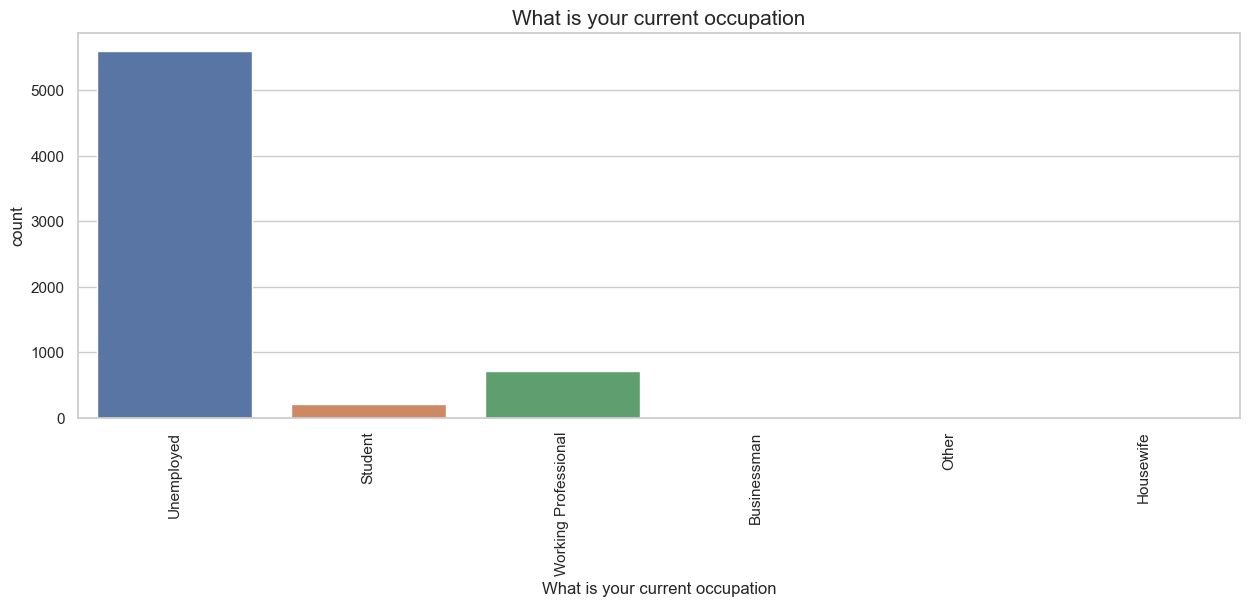

In [21]:
# Column 'What is your current occupation' with 29.11% missing values
countplot('What is your current occupation')

Since the column is skewed towards 'Unemployed', we can impute the missing values with 'Unemployed'.

In [22]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

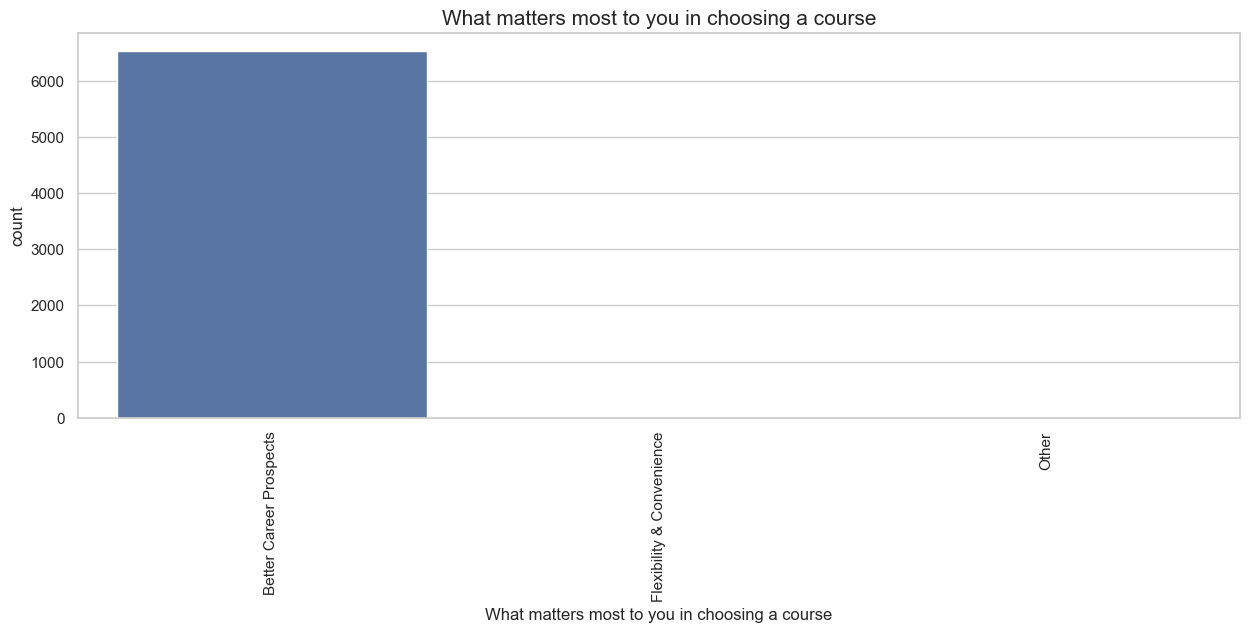

In [23]:
# Column 'What matters most to you in choosing a course' with 29.32% missing values
countplot('What matters most to you in choosing a course')

Since this column is highly skewed towards 'Better Career Prospects' no meaningful insights can be drawn from it. Hence it can be dropped.

In [24]:
leads_df=leads_df.drop('What matters most to you in choosing a course',axis=1)

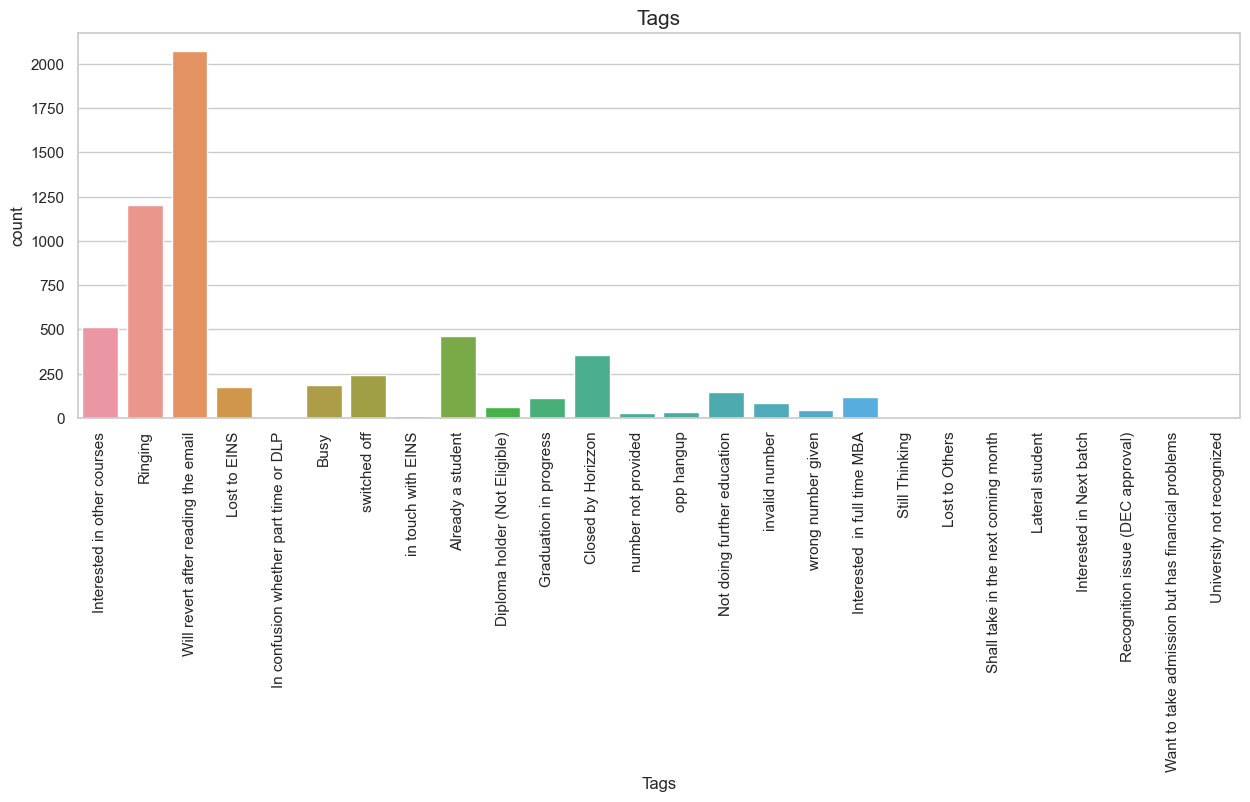

In [25]:
# Column 'Tags' with 36.29% missing values
countplot('Tags')

Since the column is not skewed towards any particular category, imputing the missing values might cause  bias. So e can remove the column as it is not particularly insightful.

In [26]:
leads_df=leads_df.drop('Tags',axis=1)

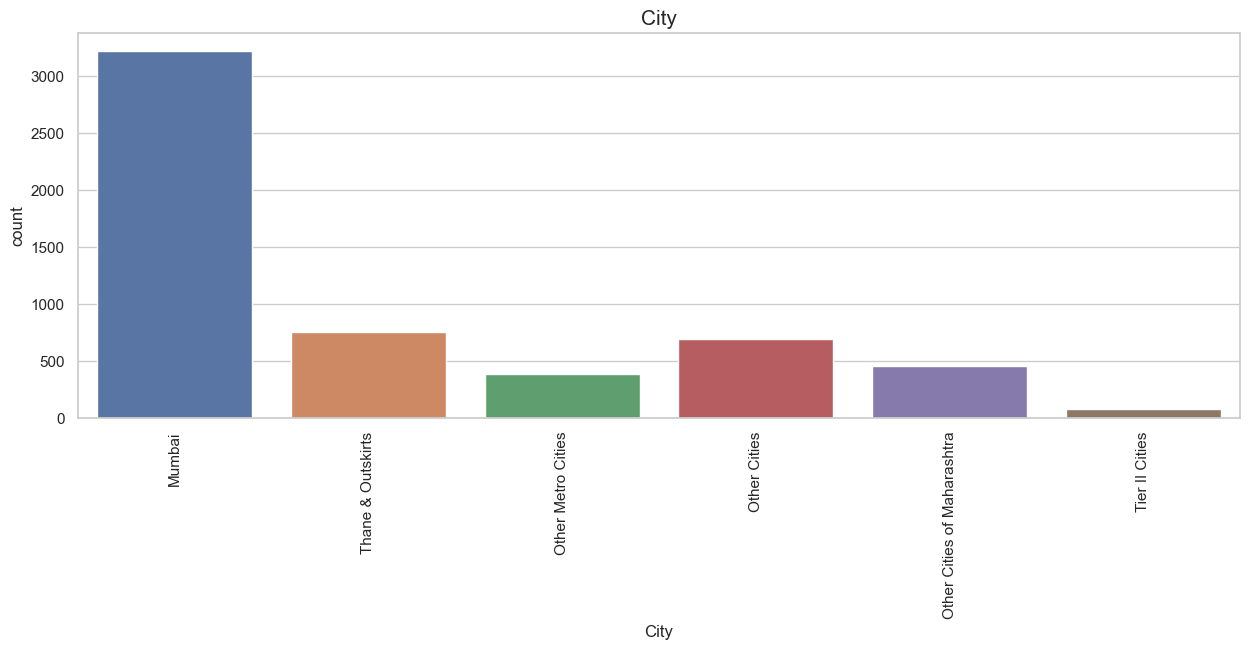

In [27]:
# Column 'City' with 39.71% missing values
countplot('City')

Since the column is skewed towards 'Mumbai', we can impute the missing values with the same.

In [28]:
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

In [29]:
# Null percentages after removing the above columns dealing with missing values
round(leads_df.isnull().sum()/len(leads_df.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [30]:
# Dropping the rows with null values (As they are only 1%)
leads_df.dropna(inplace = True)

In [31]:
round(leads_df.isnull().sum()/len(leads_df.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [32]:
# Calculating the percentage of rows retained
print(len(leads_df.index)/9240)

0.982034632034632


## Exploratory Data Analysis

In [33]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified


### Numerical variables

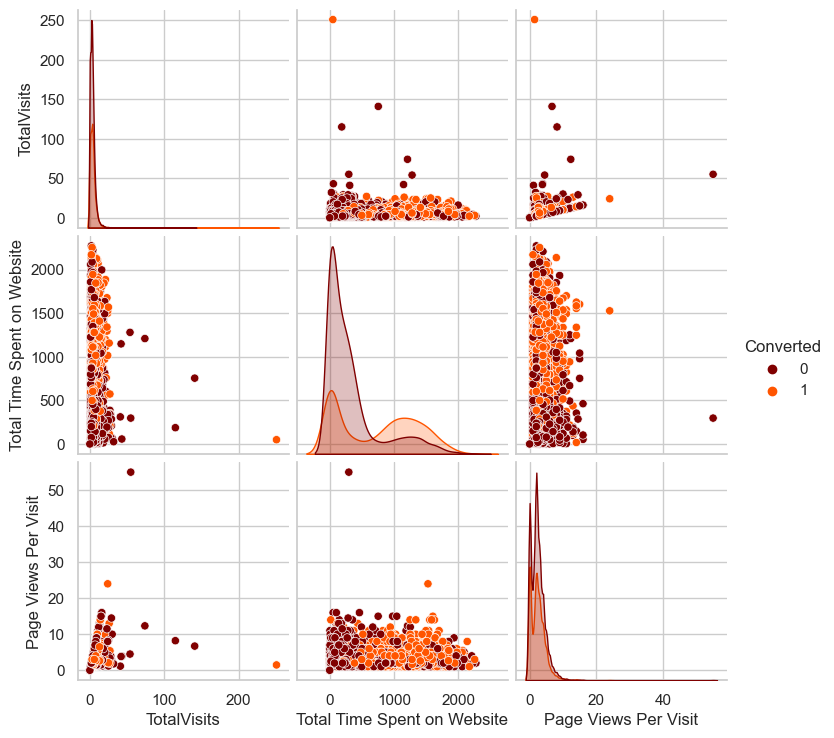

In [34]:
sns.pairplot(leads_df.iloc[:,[4,5,6,7]], hue = 'Converted', palette = 'gist_heat')
plt.show()

As we can see there are a lot of outliers in the above numerical data.

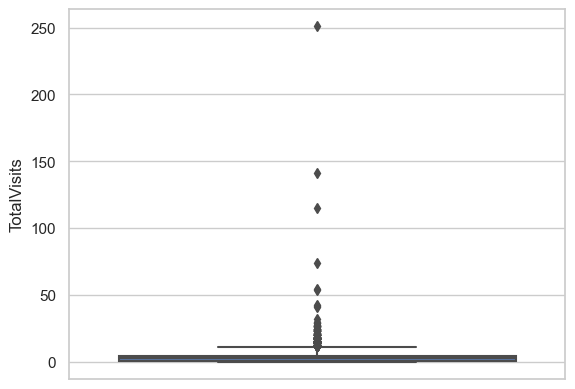

In [35]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [36]:
#checking percentile values for "Total Visits"

leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

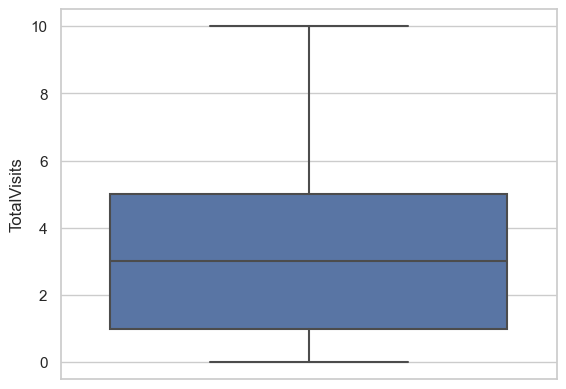

In [37]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

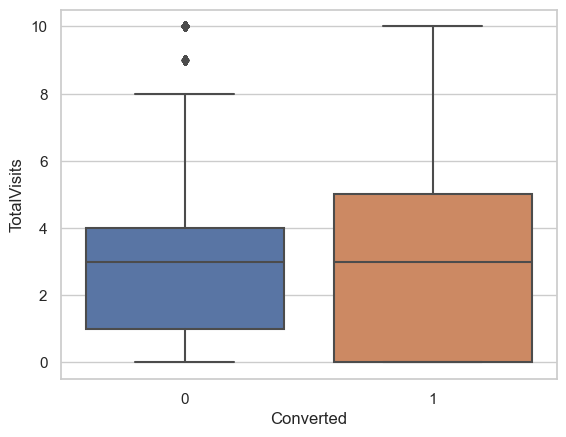

In [38]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

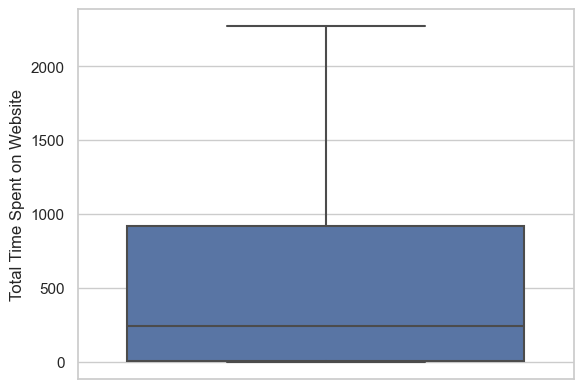

In [39]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads_df['Total Time Spent on Website'])
plt.show()

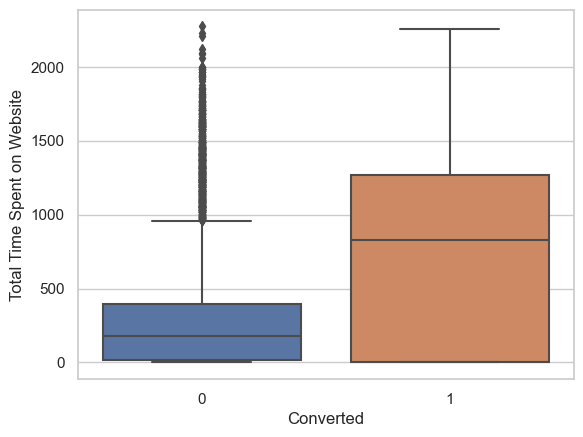

In [40]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

In [41]:
leads_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

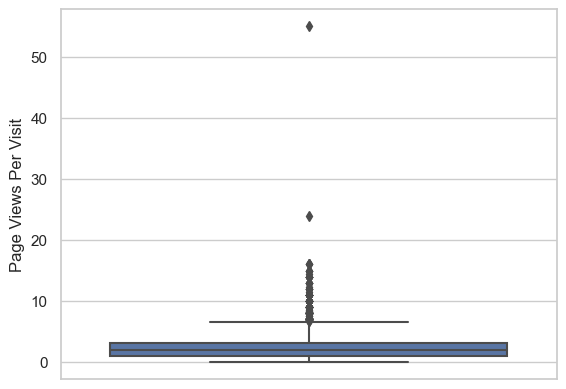

In [42]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads_df['Page Views Per Visit'])
plt.show()

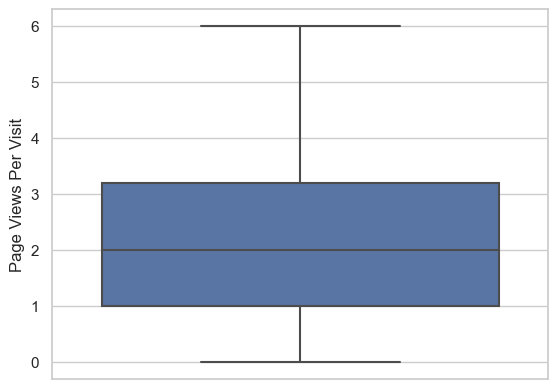

In [43]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

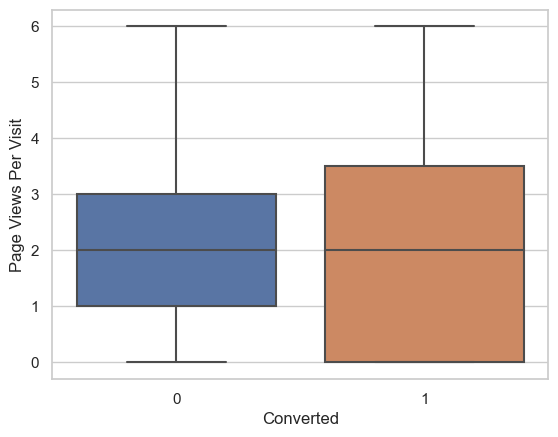

In [44]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

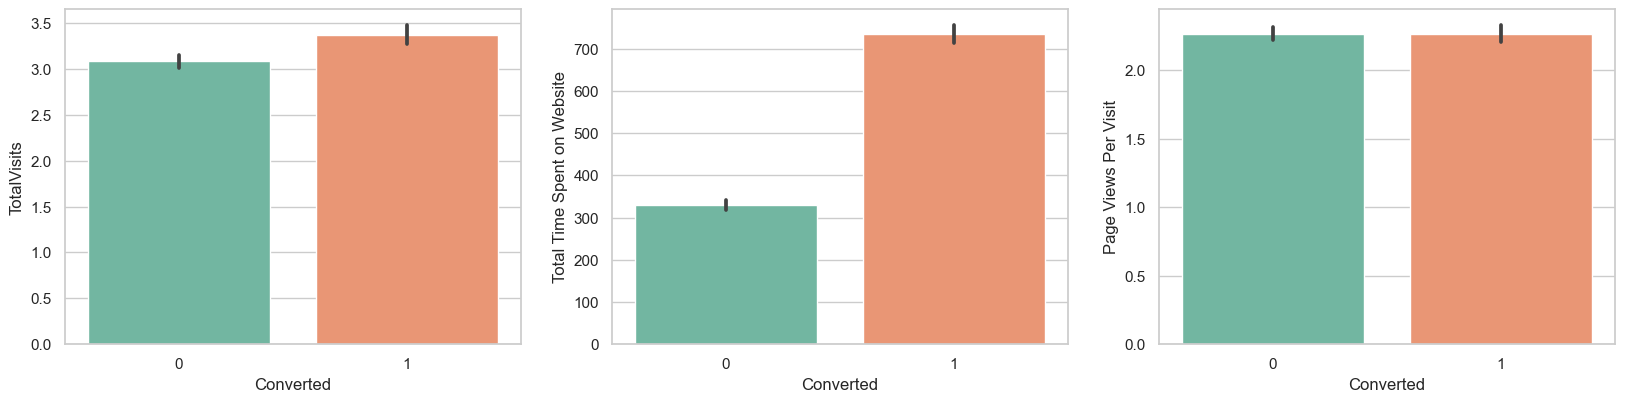

In [45]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads_df)
plt.show()

### Categorical variables

In [46]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [47]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

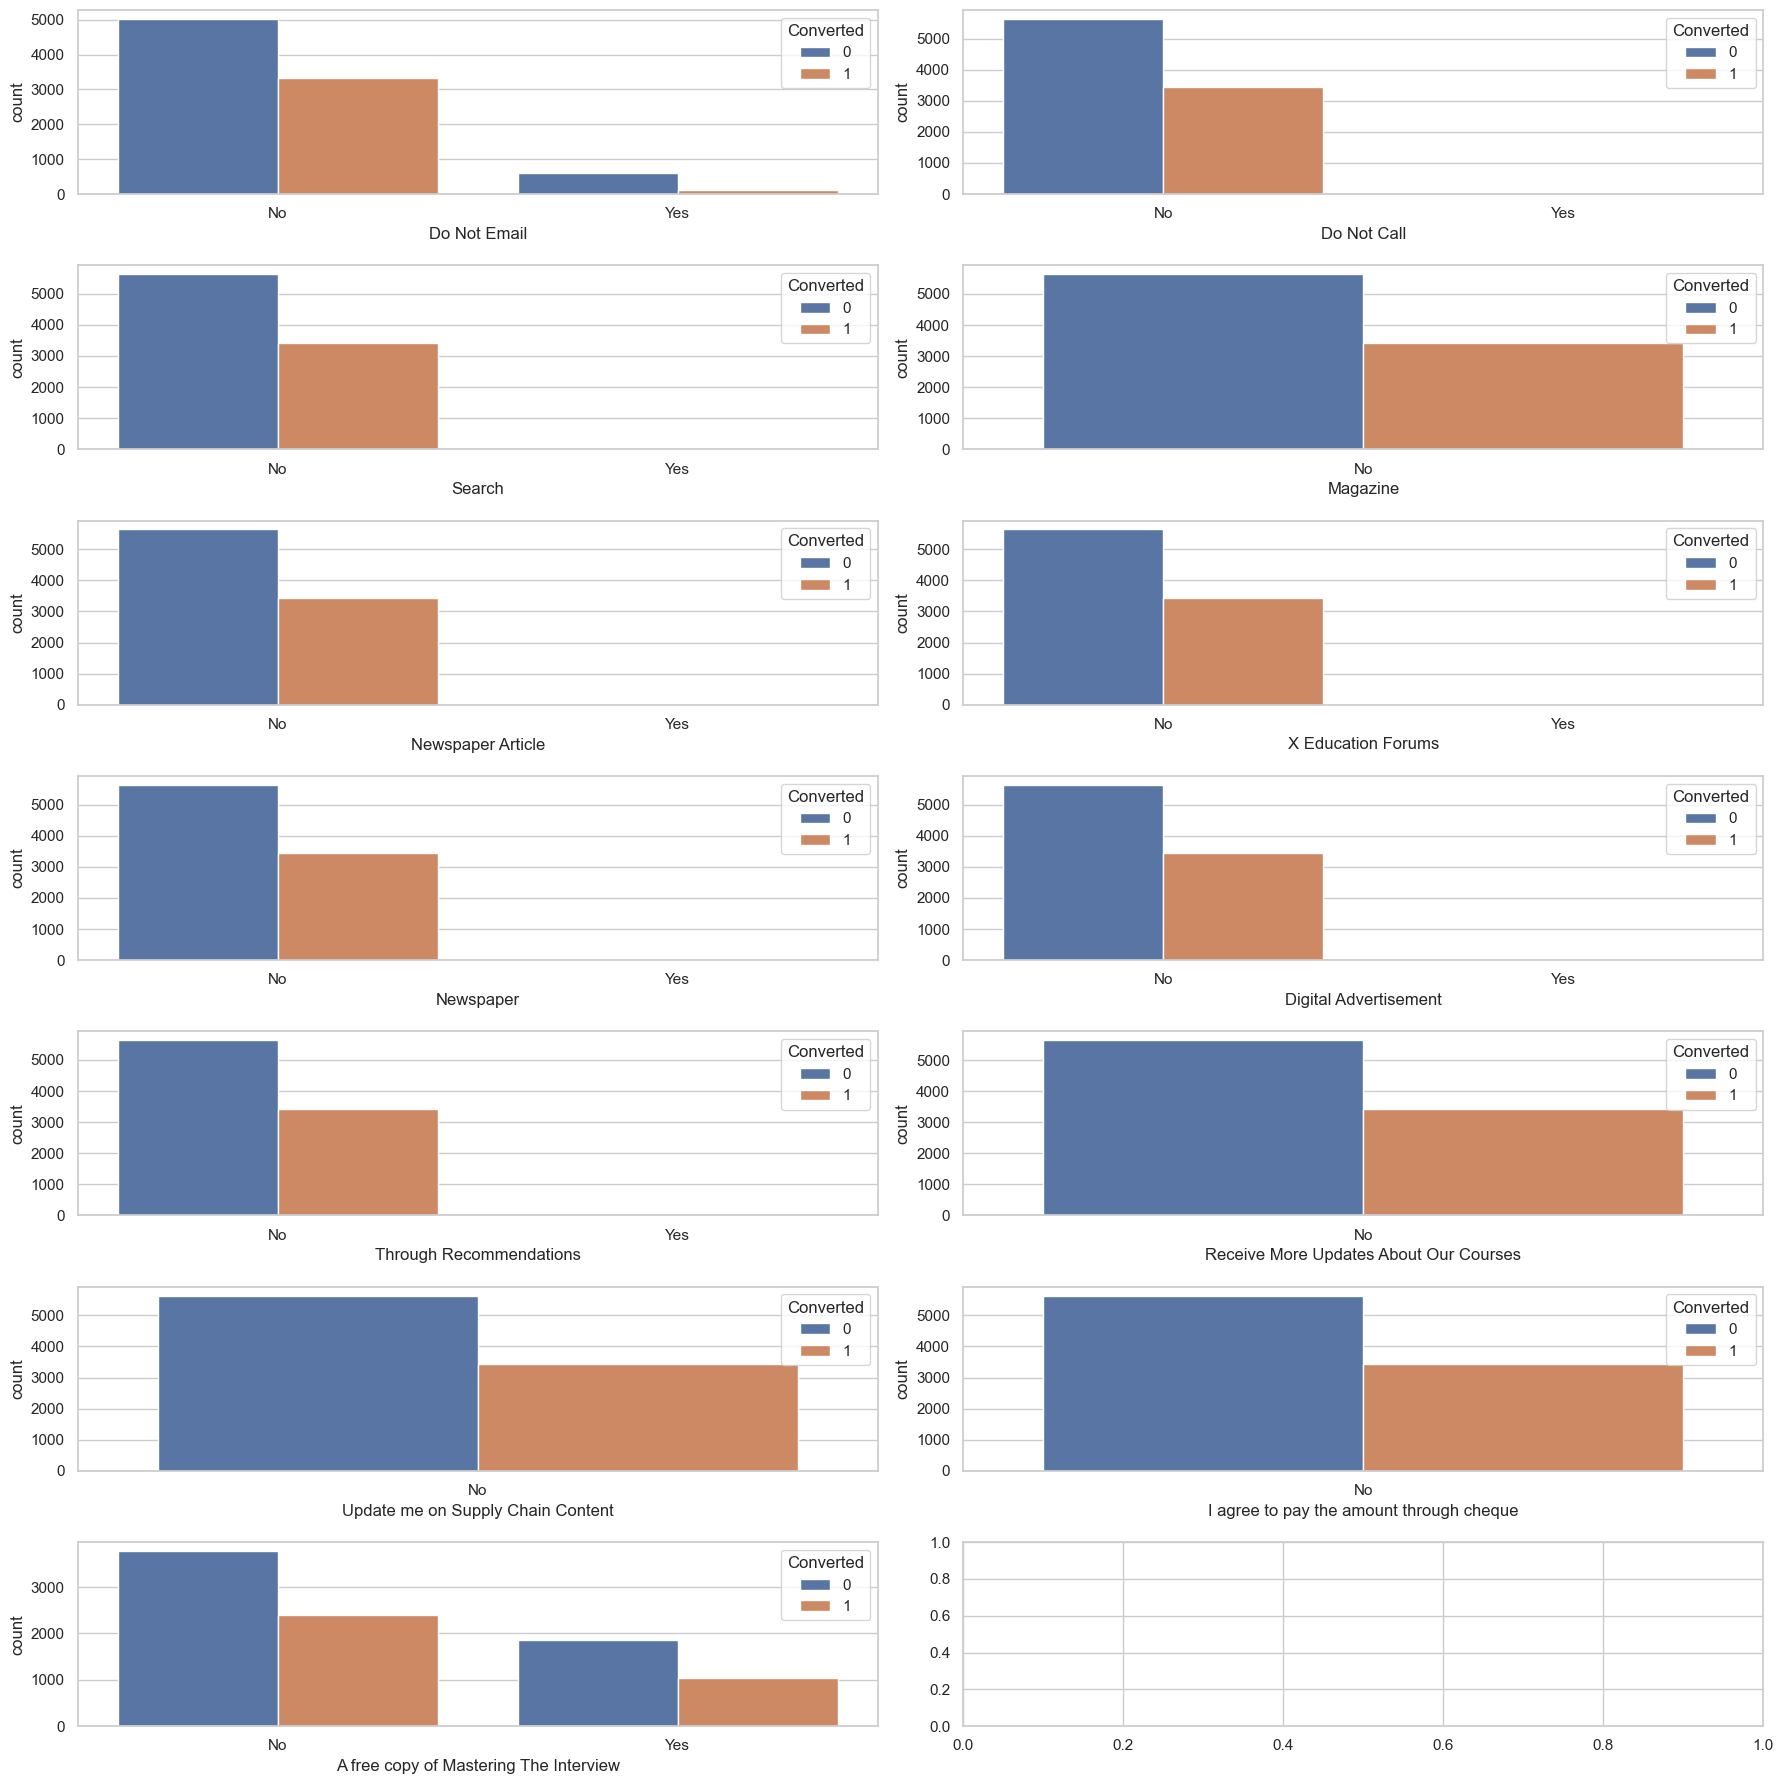

In [48]:
fig, ax = plt.subplots(7, 2, figsize=(18,18))
axes_ = [axes_row for axes in ax for axes_row in axes]

for idx, val in enumerate(leads_df.iloc[:, [2,3,12,13,14,15,16,17,18,19,20,23,24,25]].columns):
    if val == 'Last Notable Activity':
        continue
    else:
        g = sns.countplot(data = leads_df, x = val, hue = 'Converted', ax = axes_[idx])
        plt.tight_layout()

- Customers with yes on Do not email and Do not call lists have have near zero convertion.
- Convertion is low even for people who got free copy of 'The Interview'
- Certain columns are not giving much information as most of the values are "No" so we will going to drop the same in the later stage.

In [49]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [50]:
#replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [51]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

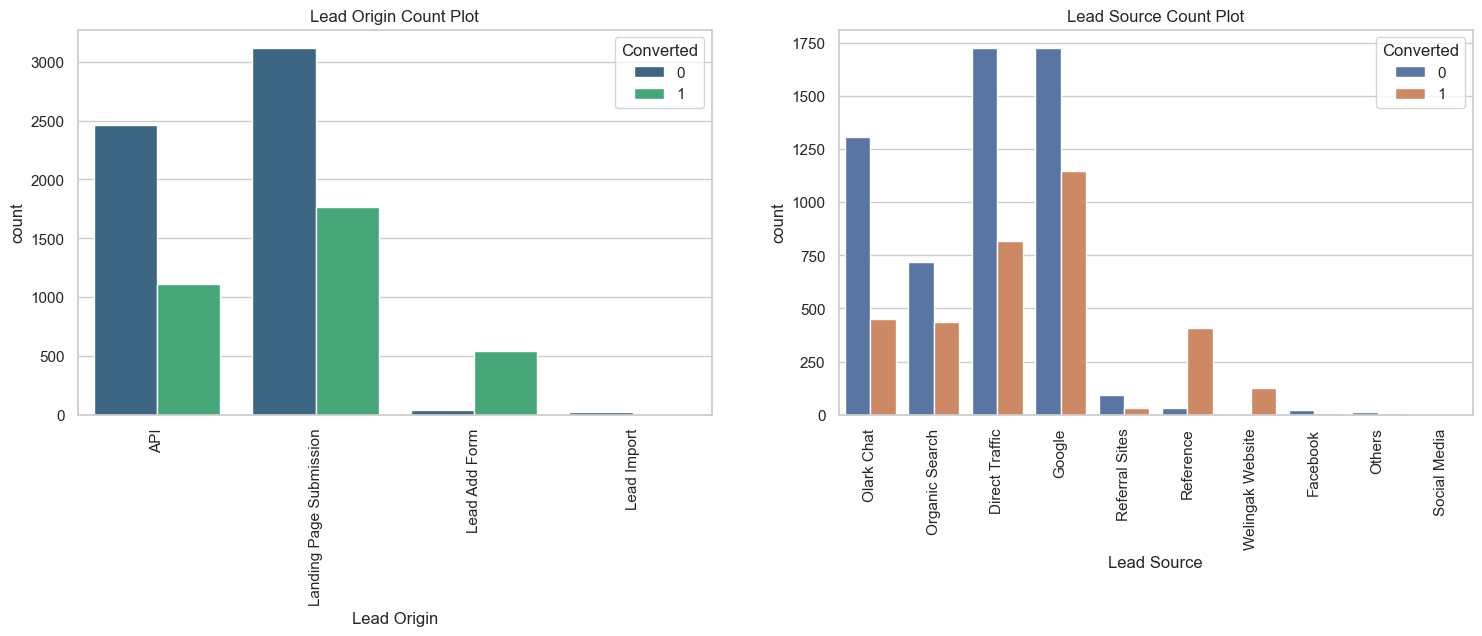

In [52]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title("Lead Origin Count Plot")
sns.countplot(data = leads_df, x = 'Lead Origin', hue = 'Converted', palette = 'viridis')
plt.xticks(rotation = 90)
plt.subplot(122)
plt.title("Lead Source Count Plot")
sns.countplot(data = leads_df, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.
- Google and Direct traffic generates maximum number of leads.

In [53]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna=False)

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

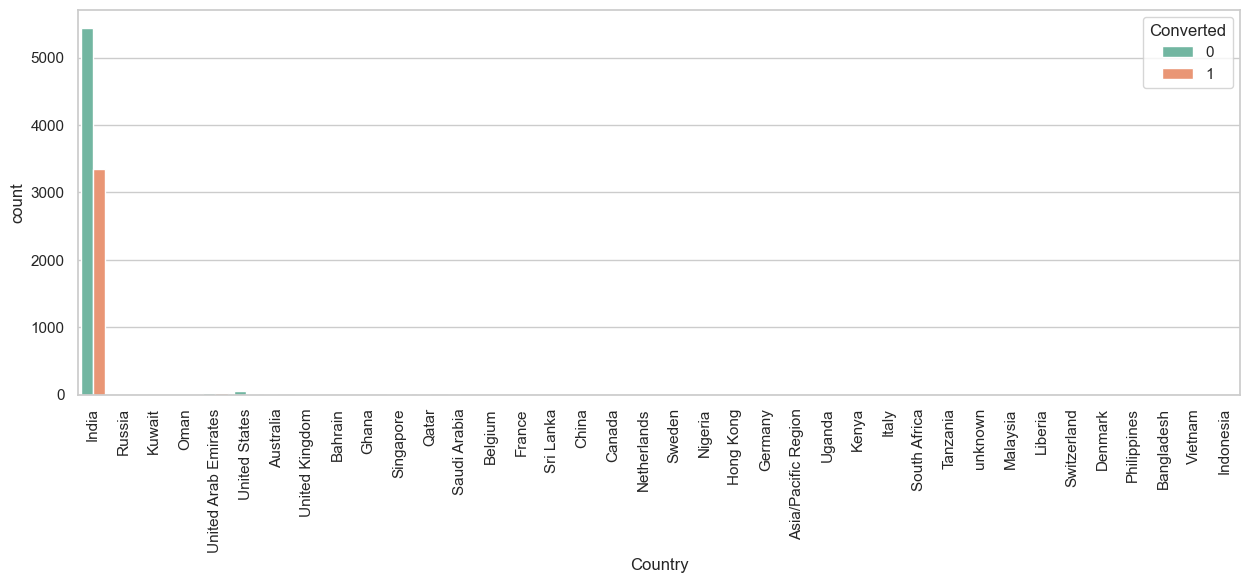

In [54]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the countplot
sns.countplot(x='Country', hue='Converted', data=leads_df, palette='Set2', ax=ax)

# Set the xticklabels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

As most of the responses are from India this column does not provide any insight. So we can drop it.

In [55]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

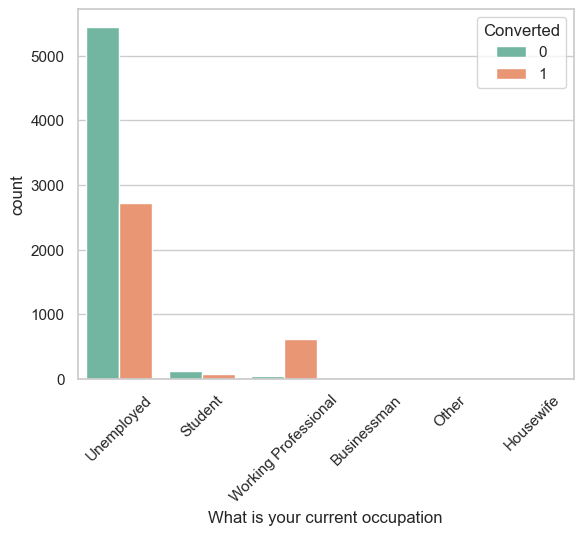

In [56]:
# Plot the countplot
s1 = sns.countplot(x='What is your current occupation', hue='Converted', data=leads_df, palette='Set2')
s1.set_xticklabels(s1.get_xticklabels(), rotation=45)
plt.show()

Working professionals have a high rate of Convertion

In [57]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [58]:
#replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

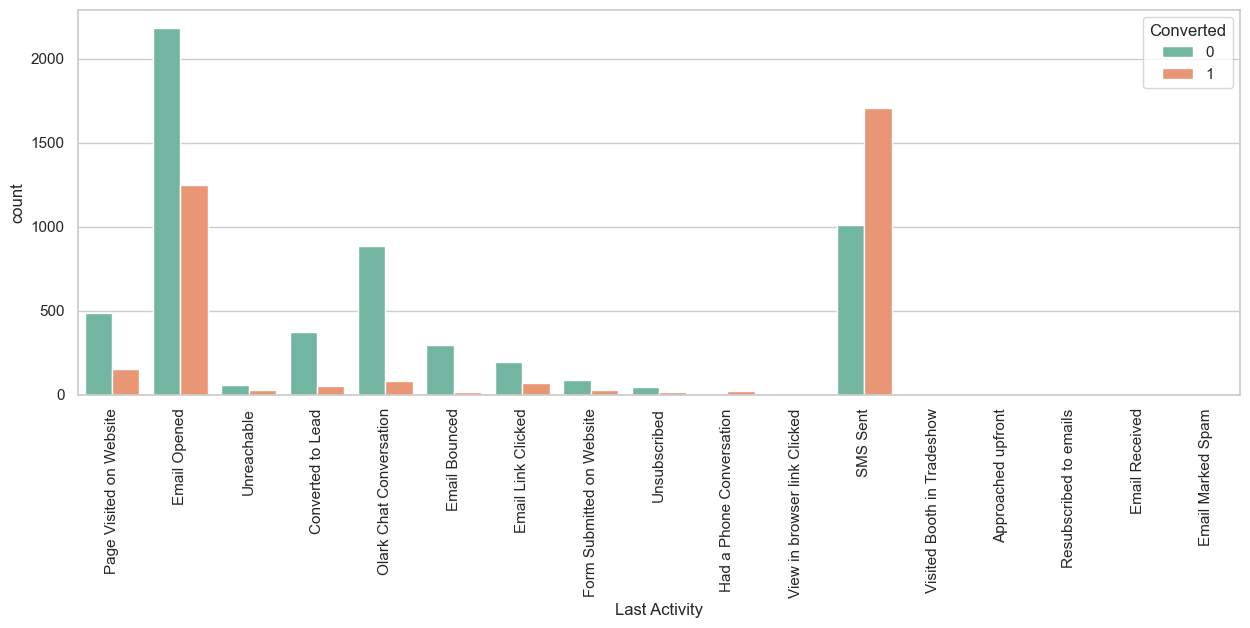

In [59]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [60]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [61]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

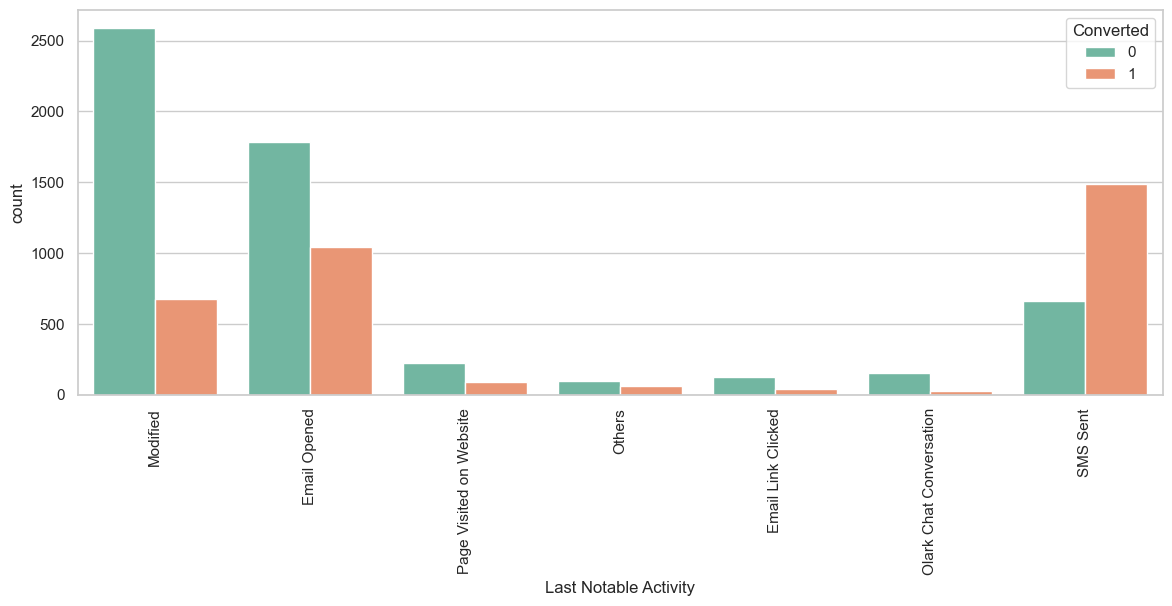

In [62]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

SMS sent has the most conversion rate

In [63]:
#creating a list of columns to be dropped

cols_to_drop=(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
               'Country', 'Last Activity'])

In [64]:
# New dataframe
leads = leads_df.drop(columns = cols_to_drop)

In [65]:
#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   City                                    9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [66]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Others,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Unemployed,Mumbai,No,Modified


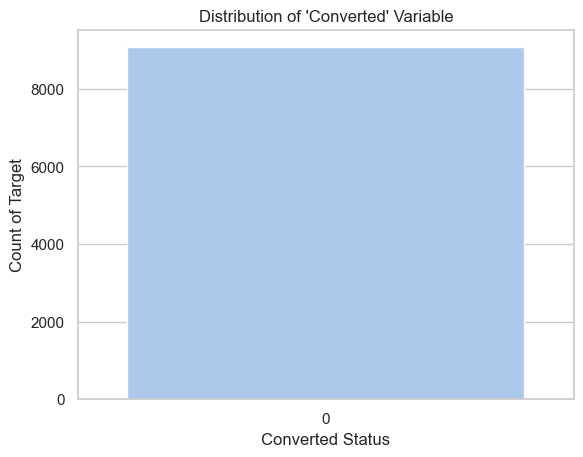

In [67]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
# Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted, palette="pastel")
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [68]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

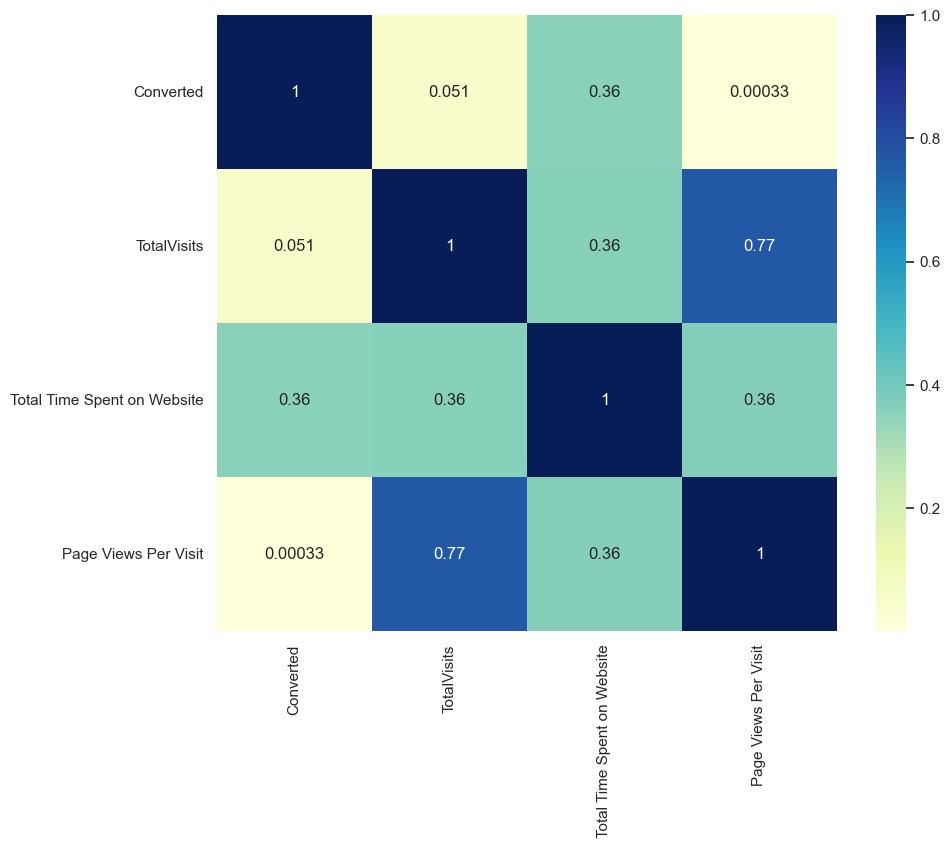

In [69]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

'TotalVisits' and 'Page views per visit' seem to have a good correlation

## Data Preparation 

In [70]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [71]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,No,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,No,Modified


In [72]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   City                                    9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [73]:
#getting a list of categorical columns for creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [74]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
# Concatenating the dummy_data to the leads dataframe
leads = pd.concat([leads, dummy_data], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,...,0,0,0,1,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,...,0,0,0,0,0,1,0,0,0,0


In [76]:
# Dropping the columns for which dummies were created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

In [77]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Train-Test data split

In [78]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [79]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [82]:
#lets check the shape
print("X_train Size", X_train.shape)
print("Y_train Size", y_train.shape)

X_train Size (6351, 51)
Y_train Size (6351,)


In [83]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [84]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,-0.292645,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1012,3.417111,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,-0.292645,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4750,-0.292645,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,-0.292645,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [85]:
# Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

37.85541106458012

### Feature Selection Using RFE

In [86]:
# importing necessary library
import statsmodels.api as sm

In [87]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([False, False,  True, False,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 34),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 10),
 ('Specialization_E-COMMERCE', False, 17),
 ('Specialization_Finance Management', False, 31),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 5),
 ('Specialization_Human Resource Management', False, 30),
 ('Specializati

In [91]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [92]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',

## Model building

#### Model 1

In [93]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.0
Date:                Tue, 17 Oct 2023   Deviance:                       5360.0
Time:                        13:27:53   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3868
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0352      0.634     -0.055      0.956      -1.277       1.207
Total Time Spent on Website                              1.1139      0.040     27.711      0.000       1.035       1.193
Lead Origin_Landing Page Submission                     -1.1506      0.128     -9.019      0.000      -1.401      -0.901
Lead Origin_Lead Add Form                                1.6473      0.894      1.843      0.065      -0.105       3.399
Lead Origin_Lead Import                                  1.0477      0.480      2.182      0.029       0.107       1.989
Lead Source_Olark Chat                                   0.9682      0.120      8.098      0.000       0.734       1.202
Lead Source_Reference                                    1.8163      0.918      1.978      0.048       0.017       3.616
Lead Source_Welingak Website                             4.2928      1.147      3.741      0.000       2.044       6.542
Specialization_Others                                   -1.1816      0.124     -9.561      0.000      -1.424      -0.939
What is your current occupation_Housewife               21.8955   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5159      0.668     -0.773      0.440      -1.824       0.793
What is your current occupation_Unemployed              -0.8662      0.630     -1.374      0.169      -2.102       0.369
What is your current occupation_Working Professional     1.7675      0.657      2.691      0.007       0.480       3.055
Last Notable Activity_Email Opened                       0.7695      0.082      9.338      0.000       0.608       0.931
Last Notable Activity_Others                             1.0393      0.234      4.448      0.000       0.581       1.497
Last Notable Activity_SMS Sent                           2.1225      0.089     23.876      0.000       1.948       2.297
========================================================================================================================
"""

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.63
5,Lead Source_Reference,48.08
6,Lead Source_Welingak Website,15.51
10,What is your current occupation_Unemployed,12.85
1,Lead Origin_Landing Page Submission,7.24
7,Specialization_Others,4.61
4,Lead Source_Olark Chat,2.17
11,What is your current occupation_Working Profes...,1.89
12,Last Notable Activity_Email Opened,1.75
14,Last Notable Activity_SMS Sent,1.68


In [95]:
#dropping column with high p-value & high VIF

col = col.drop('What is your current occupation_Unemployed', 1)

#### Model 2

In [96]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.0
Date:                Tue, 17 Oct 2023   Deviance:                       5361.9
Time:                        13:29:09   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8861      0.130     -6.814      0.000      -1.141      -0.631
Total Time Spent on Website                              1.1150      0.040     27.744      0.000       1.036       1.194
Lead Origin_Landing Page Submission                     -1.1630      0.127     -9.134      0.000      -1.413      -0.913
Lead Origin_Lead Add Form                                1.6387      0.894      1.834      0.067      -0.113       3.390
Lead Origin_Lead Import                                  1.0384      0.480      2.162      0.031       0.097       1.980
Lead Source_Olark Chat                                   0.9658      0.120      8.079      0.000       0.731       1.200
Lead Source_Reference                                    1.8221      0.918      1.985      0.047       0.023       3.621
Lead Source_Welingak Website                             4.2987      1.147      3.747      0.000       2.050       6.547
Specialization_Others                                   -1.1932      0.123     -9.668      0.000      -1.435      -0.951
What is your current occupation_Housewife               22.7579   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                  0.3476      0.225      1.541      0.123      -0.094       0.790
What is your current occupation_Working Professional     2.6302      0.193     13.612      0.000       2.251       3.009
Last Notable Activity_Email Opened                       0.7693      0.082      9.339      0.000       0.608       0.931
Last Notable Activity_Others                             1.0416      0.233      4.467      0.000       0.585       1.499
Last Notable Activity_SMS Sent                           2.1194      0.089     23.849      0.000       1.945       2.294
========================================================================================================================
"""

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.37
5,Lead Source_Reference,48.06
6,Lead Source_Welingak Website,15.49
7,Specialization_Others,1.95
4,Lead Source_Olark Chat,1.89
1,Lead Origin_Landing Page Submission,1.74
11,Last Notable Activity_Email Opened,1.60
13,Last Notable Activity_SMS Sent,1.59
0,Total Time Spent on Website,1.30
10,What is your current occupation_Working Profes...,1.20


In [98]:
#dropping column with high p-value and high VIF

col = col.drop('Lead Source_Reference', 1)

#### Model 3

In [99]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.5
Date:                Tue, 17 Oct 2023   Deviance:                       5365.1
Time:                        13:30:10   Pearson chi2:                 6.44e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3863
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8871      0.130     -6.824      0.000      -1.142      -0.632
Total Time Spent on Website                              1.1141      0.040     27.717      0.000       1.035       1.193
Lead Origin_Landing Page Submission                     -1.1613      0.127     -9.125      0.000      -1.411      -0.912
Lead Origin_Lead Add Form                                3.3864      0.237     14.281      0.000       2.922       3.851
Lead Origin_Lead Import                                  1.0372      0.480      2.160      0.031       0.096       1.978
Lead Source_Olark Chat                                   0.9620      0.120      8.042      0.000       0.728       1.196
Lead Source_Welingak Website                             2.5479      0.754      3.378      0.001       1.069       4.026
Specialization_Others                                   -1.1894      0.123     -9.646      0.000      -1.431      -0.948
What is your current occupation_Housewife               22.7642   1.53e+04      0.001      0.999      -3e+04       3e+04
What is your current occupation_Student                  0.3492      0.225      1.551      0.121      -0.092       0.791
What is your current occupation_Working Professional     2.6319      0.193     13.630      0.000       2.253       3.010
Last Notable Activity_Email Opened                       0.7692      0.082      9.341      0.000       0.608       0.931
Last Notable Activity_Others                             1.0414      0.233      4.468      0.000       0.585       1.498
Last Notable Activity_SMS Sent                           2.1179      0.089     23.842      0.000       1.944       2.292
========================================================================================================================
"""

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Others,1.95
4,Lead Source_Olark Chat,1.89
1,Lead Origin_Landing Page Submission,1.74
2,Lead Origin_Lead Add Form,1.64
10,Last Notable Activity_Email Opened,1.60
12,Last Notable Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.36
0,Total Time Spent on Website,1.30
9,What is your current occupation_Working Profes...,1.20
11,Last Notable Activity_Others,1.04


In [101]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife', 1)

#### Model 4

In [102]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.8
Date:                Tue, 17 Oct 2023   Deviance:                       5373.6
Time:                        13:30:51   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8835      0.130     -6.803      0.000      -1.138      -0.629
Total Time Spent on Website                              1.1133      0.040     27.728      0.000       1.035       1.192
Lead Origin_Landing Page Submission                     -1.1619      0.127     -9.138      0.000      -1.411      -0.913
Lead Origin_Lead Add Form                                3.4035      0.237     14.372      0.000       2.939       3.868
Lead Origin_Lead Import                                  1.0313      0.480      2.147      0.032       0.090       1.973
Lead Source_Olark Chat                                   0.9609      0.120      8.035      0.000       0.727       1.195
Lead Source_Welingak Website                             2.5300      0.754      3.354      0.001       1.052       4.008
Specialization_Others                                   -1.1944      0.123     -9.692      0.000      -1.436      -0.953
What is your current occupation_Student                  0.3452      0.225      1.532      0.125      -0.096       0.787
What is your current occupation_Working Professional     2.6273      0.193     13.605      0.000       2.249       3.006
Last Notable Activity_Email Opened                       0.7746      0.082      9.418      0.000       0.613       0.936
Last Notable Activity_Others                             1.0401      0.233      4.463      0.000       0.583       1.497
Last Notable Activity_SMS Sent                           2.1162      0.089     23.830      0.000       1.942       2.290
========================================================================================================================
"""

In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Others,1.95
4,Lead Source_Olark Chat,1.89
1,Lead Origin_Landing Page Submission,1.74
2,Lead Origin_Lead Add Form,1.64
9,Last Notable Activity_Email Opened,1.59
11,Last Notable Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.36
0,Total Time Spent on Website,1.30
8,What is your current occupation_Working Profes...,1.19
10,Last Notable Activity_Others,1.04


In [105]:
#dropping column with high p-value and high VIF

col = col.drop('What is your current occupation_Student', 1)

#### Model 5

In [106]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.9
Date:                Tue, 17 Oct 2023   Deviance:                       5375.9
Time:                        13:31:29   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3853
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8796      0.130     -6.769      0.000      -1.134      -0.625
Total Time Spent on Website                              1.1133      0.040     27.730      0.000       1.035       1.192
Lead Origin_Landing Page Submission                     -1.1578      0.127     -9.101      0.000      -1.407      -0.908
Lead Origin_Lead Add Form                                3.4075      0.237     14.399      0.000       2.944       3.871
Lead Origin_Lead Import                                  1.0244      0.480      2.133      0.033       0.083       1.966
Lead Source_Olark Chat                                   0.9664      0.120      8.083      0.000       0.732       1.201
Lead Source_Welingak Website                             2.5218      0.754      3.344      0.001       1.044       4.000
Specialization_Others                                   -1.1938      0.123     -9.674      0.000      -1.436      -0.952
What is your current occupation_Working Professional     2.6187      0.193     13.569      0.000       2.240       2.997
Last Notable Activity_Email Opened                       0.7789      0.082      9.476      0.000       0.618       0.940
Last Notable Activity_Others                             1.0367      0.233      4.448      0.000       0.580       1.494
Last Notable Activity_SMS Sent                           2.1134      0.089     23.814      0.000       1.939       2.287
========================================================================================================================
"""

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Others,1.95
4,Lead Source_Olark Chat,1.89
1,Lead Origin_Landing Page Submission,1.73
2,Lead Origin_Lead Add Form,1.63
8,Last Notable Activity_Email Opened,1.59
10,Last Notable Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.36
0,Total Time Spent on Website,1.30
7,What is your current occupation_Working Profes...,1.19
9,Last Notable Activity_Others,1.04


In [108]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Import', 1)

#### Model 6

In [109]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.0
Date:                Tue, 17 Oct 2023   Deviance:                       5380.0
Time:                        13:32:05   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3849
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8391      0.129     -6.522      0.000      -1.091      -0.587
Total Time Spent on Website                              1.1053      0.040     27.711      0.000       1.027       1.183
Lead Origin_Landing Page Submission                     -1.1958      0.126     -9.477      0.000      -1.443      -0.948
Lead Origin_Lead Add Form                                3.3703      0.236     14.283      0.000       2.908       3.833
Lead Source_Olark Chat                                   0.9378      0.119      7.910      0.000       0.705       1.170
Lead Source_Welingak Website                             2.5322      0.754      3.357      0.001       1.054       4.011
Specialization_Others                                   -1.2165      0.123     -9.864      0.000      -1.458      -0.975
What is your current occupation_Working Professional     2.6188      0.193     13.574      0.000       2.241       2.997
Last Notable Activity_Email Opened                       0.7847      0.082      9.554      0.000       0.624       0.946
Last Notable Activity_Others                             1.0315      0.233      4.428      0.000       0.575       1.488
Last Notable Activity_SMS Sent                           2.1112      0.089     23.807      0.000       1.937       2.285
========================================================================================================================
"""

In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Specialization_Others,1.95
3,Lead Source_Olark Chat,1.88
1,Lead Origin_Landing Page Submission,1.72
2,Lead Origin_Lead Add Form,1.63
9,Last Notable Activity_SMS Sent,1.59
7,Last Notable Activity_Email Opened,1.58
4,Lead Source_Welingak Website,1.36
0,Total Time Spent on Website,1.30
6,What is your current occupation_Working Profes...,1.19
8,Last Notable Activity_Others,1.04


The above model has been corrected for P-values and VIF

#### Making Prediction on the Train set

In [111]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.193512
1012    0.450644
9226    0.109089
4750    0.869061
7987    0.548643
1281    0.748307
2880    0.097586
4971    0.966959
7536    0.855559
1248    0.504689
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19351209, 0.45064439, 0.10908906, 0.8690613 , 0.54864318,
       0.74830739, 0.09758559, 0.96695926, 0.85555892, 0.50468887])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.193512,3009
1,0,0.450644,1012
2,0,0.109089,9226
3,1,0.869061,4750
4,1,0.548643,7987


In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.193512,3009,0
1,0,0.450644,1012,0
2,0,0.109089,9226,0
3,1,0.869061,4750,1
4,1,0.548643,7987,1


#### Making the Confusion matrix

In [115]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3478  427]
 [ 751 1695]]


In [116]:
# The confusion matrix indicates as below

# Predicted     not_converted    converted
# Actual
# not_converted        3478      427
# converted            751       1695  

In [117]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8145173988348292


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6929681112019623

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.8906530089628681

In [121]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10934699103713189


In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.7987747408105561


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8224166469614566


#### Plotting the ROC Curve

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

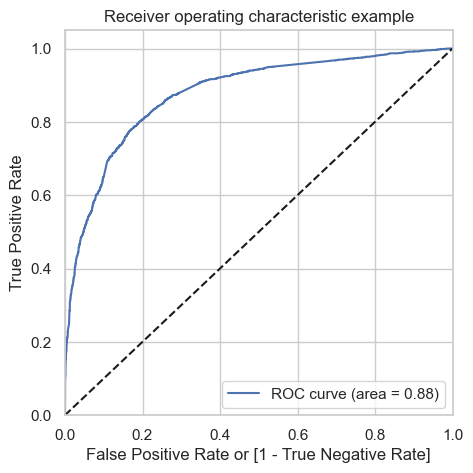

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under the ROC curve is 0.88. Hence, this is a good model.

#### Finding Optimal Cutoff Point

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.193512,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.450644,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.109089,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.869061,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.548643,7987,1,1,1,1,1,1,1,0,0,0,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.542434  0.970973  0.274008
0.2   0.2  0.747756  0.910057  0.646095
0.3   0.3  0.792316  0.841783  0.761332
0.4   0.4  0.810896  0.766558  0.838668
0.5   0.5  0.814517  0.692968  0.890653
0.6   0.6  0.793103  0.580540  0.926248
0.7   0.7  0.780664  0.513491  0.948015
0.8   0.8  0.760195  0.422731  0.971575
0.9   0.9  0.721619  0.296811  0.987708


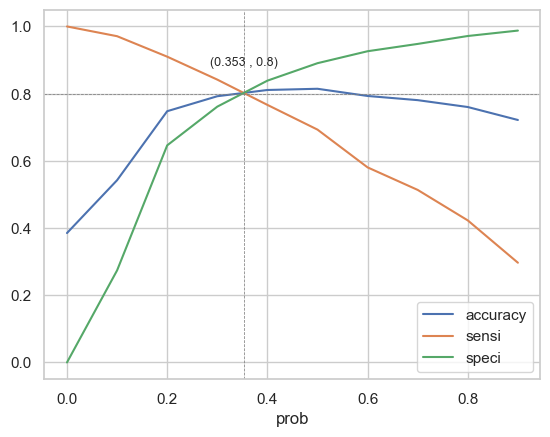

In [129]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

From the above graph a cut off point is 0.353

In [163]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.353 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.193512,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.450644,1012,0,1,1,1,1,1,0,0,0,0,0,1,45
2,0,0.109089,9226,0,1,1,0,0,0,0,0,0,0,0,0,11
3,1,0.869061,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.548643,7987,1,1,1,1,1,1,1,0,0,0,0,1,55


In [164]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.193512,3009,0,19
1,0,0.450644,1012,1,45
2,0,0.109089,9226,0,11
3,1,0.869061,4750,1,87
4,1,0.548643,7987,1,55


In [165]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1964
0     482
Name: final_Predicted, dtype: int64

In [167]:
# check the precentage of final_predicted conversions

1964/float(1964+482)

0.802943581357318

In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8036529680365296

In [169]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3140,  765],
       [ 482, 1964]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.802943581357318

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.8040973111395646

#### Inference on Test data

Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is a good score. We have the following values for the Train Data:

Accuracy : 80.36%
Sensitivity :80.29%
Specificity : 80.41%
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value, Negative Predictive Values, Precision & Recall.

In [173]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.19590268886043533


In [174]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7196775375595457


In [175]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8669243511871894


In [176]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3140,  765],
       [ 482, 1964]], dtype=int64)

### Precision and recall View

In [177]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7196775375595457

In [178]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.802943581357318

In [179]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [180]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

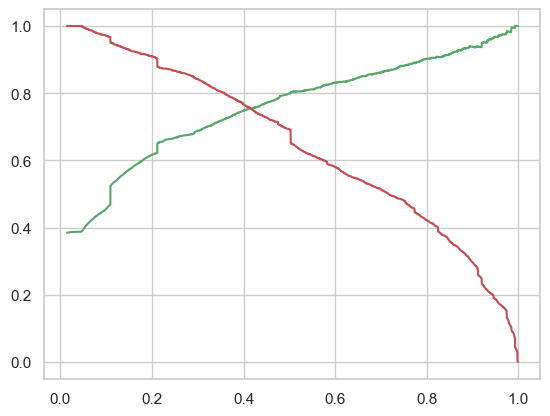

In [181]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The above cut off point is 0.42

In [182]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3271,-0.591008,0,0,0,0,1,0,1,0,0
1490,1.894051,1,0,0,0,0,1,1,0,0
7936,-0.743117,0,0,0,0,1,0,1,0,0
4216,-0.878732,0,1,0,0,0,0,0,0,0
3830,-0.578179,1,0,0,0,0,0,1,0,0


In [183]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3271,-0.591008,0,0,0,0,1,0,1,0,0
1490,1.894051,1,0,0,0,0,1,1,0,0
7936,-0.743117,0,0,0,0,1,0,1,0,0
4216,-0.878732,0,1,0,0,0,0,0,0,0
3830,-0.578179,1,0,0,0,0,0,1,0,0


In [184]:
X_test_sm = sm.add_constant(X_test)

In [185]:
X_test_sm.shape

(2723, 11)

### Making the predictions on test set

In [186]:
y_test_pred = res.predict(X_test_sm)   

In [187]:
y_test_pred[:10]

3271    0.127388
1490    0.969590
7936    0.109839
4216    0.826343
3830    0.131326
1800    0.634426
6507    0.346683
4821    0.301534
4223    0.920896
4714    0.110159
dtype: float64

In [188]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [189]:
# Let's see the head
y_pred_1.head()

,0
3271,0.127388
1490,0.969590
7936,0.109839
4216,0.826343
3830,0.131326


In [190]:
# Let's see the head
y_pred_1.head()

,0
3271,0.127388
1490,0.969590
7936,0.109839
4216,0.826343
3830,0.131326


In [191]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [192]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [193]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [195]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.127388
1,1,1490,0.969590
2,0,7936,0.109839
3,1,4216,0.826343
4,0,3830,0.131326


In [196]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [197]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.127388
1,1,1490,0.969590
2,0,7936,0.109839
3,1,4216,0.826343
4,0,3830,0.131326


In [198]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [199]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.127388,13
1,1490,1,0.969590,97
2,7936,0,0.109839,11
3,4216,1,0.826343,83
4,3830,0,0.131326,13


In [200]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [201]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    743
0    246
Name: final_Predicted, dtype: int64

In [203]:
# check the precentage of final_predicted conversions on test data

743/float(743+246)

0.7512639029322548

In [204]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8108703635695924

In [205]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1465,  269],
       [ 246,  743]], dtype=int64)

In [206]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7512639029322548

In [208]:
# Let us calculate specificity
TN / float(TN+FP)

0.8448673587081892

### Observation and Inference

#### Train Data:
- Accuracy : 80.36% 
- Sensitivity :80.29% 
- Specificity : 80.41% 

#### Test Data:
- Accuracy: 81.08%
- Sensitivity: 75.12%
- Specificity: 84.48%

These results are similar to the results obtained on the training data, which suggests that the model is performing well.

The important features that contribute to the probability of a lead being converted are:

- Lead Origin: Lead Add Form

- What is your current occupation: Working Professional

- Lead Source_Welingak Website 

These features can be used to target marketing campaigns more effectively. For example, if a company is trying to sell a product or service to working professionals, they may want to focus their marketing efforts on leads that have those characteristics.

Here are some additional insights that can be gained from this information:

- The model is more likely to correctly predict that a lead will convert if the lead came from the Lead Add Form.

- The model is more likely to correctly predict that a lead will convert if the lead is a working professional.

- The model is more likely to correctly predict that a lead will convert if the lead source is from Welingak Website.

This information can be used to improve the conversion rate of a company's marketing campaigns.